# scRNA-seq ovarian cancer

**Data Source Acknowledgment:** <br>
The scRNA-seq dataset on ovarian cancer utilized in this repository originates from the Gene Expression Omnibus (GEO) under the accession number GSE146026. This dataset comprises data from approximately 11,000 ascites cells collected from 22 specimens obtained from 11 patients diagnosed with High-Grade Serous Ovarian Cancer (HGSOC).

The dataset named GSE146026_Izar_HGSOC_ascites_10x_log.tsv, sourced from [GEO: GSE146026](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE146026), serves as a valuable resource for analyzing gene expression patterns in HGSOC ascites cells. It is important to note that this dataset is used exclusively for Python practice purposes within this repository.

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Loading

In [3]:
df1 = pd.read_csv('GSE146026_Izar_HGSOC_ascites_10x_log.tsv', sep='\t', skiprows=1,\
                  on_bad_lines =  'warn', index_col = 0)

In [4]:
df1.head(5)

10x_3288_t1_AAACATACCTTCCG-1  10x_3288_t1_AAACATACTCCTAT-1  \
10x_barcode                                                               
patient                           5.00000                       5.00000   
time                              1.00000                       1.00000   
sample_ID                      3288.10000                    3288.10000   
clst                              1.00000                       1.00000   
TSNE_x                           45.33631                      35.07609   

             10x_3288_t1_AAACATTGAACTGC-1  10x_3288_t1_AAACATTGCTGACA-1  \
10x_barcode                                                               
patient                           5.00000                       5.00000   
time                              1.00000                       1.00000   
sample_ID                      3288.10000                    3288.10000   
clst                              1.00000                       2.00000   
TSNE_x                           27.41272                     -12.22481   

             10x_3288_t1_AAACCGTGACAGTC-1  10x_3288_t1_AAACCGTGTACAGC-1  \
10x_barcode                                                               
patient                          5.000000                       5.00000   
time                             1.000000                       1.00000   
sample_ID                     3288.100000                    3288.10000   
clst                             2.000000                       1.00000   
TSNE_x                          -1.349342                      38.42761   

             10x_3288_t1_AAACCGTGTATCGG-1  10x_3288_t1_AAACCGTGTTGAGC-1  \
10x_barcode                                                               
patient                           5.00000                       5.00000   
time                              1.00000                       1.00000   
sample_ID                      3288.10000                    3288.10000   
clst                              1.00000                       1.00000   
TSNE_x                           50.39773                      32.47298   

             10x_3288_t1_AAACGCACAGAACA-1  10x_3288_t1_AAACGCACATAAGG-1  ...  \
10x_barcode                                                              ...   
patient                           5.00000                       5.00000  ...   
time                              1.00000                       1.00000  ...   
sample_ID                      3288.10000                    3288.10000  ...   
clst                              1.00000                       2.00000  ...   
TSNE_x                           24.44488                     -18.64585  ...   

             10x_3250_t2_TTCCATGACCTTCG-1  10x_3250_t2_TTGACACTACCACA-1  \
10x_barcode                                                               
patient                           2.00000                        2.0000   
time                              1.00000                        1.0000   
sample_ID                      3250.10000                     3250.1000   
clst                              7.00000                        7.0000   
TSNE_x                           99.76778                      108.2164   

             10x_3250_t2_TTGAGGTGAGCGTT-1  10x_3250_t2_TTGAGGTGTTGGCA-1  \
10x_barcode                                                               
patient                           2.00000                       2.00000   
time                              1.00000                       1.00000   
sample_ID                      3250.10000                    3250.10000   
clst                              9.00000                       7.00000   
TSNE_x                           51.50392                      96.70903   

             10x_3250_t2_TTGGAGTGAGGCGA-1  10x_3250_t2_TTGGGAACAAAGCA-1  \
10x_barcode                                                               
patient                           2.00000                        2.0000   
time                              1.00000                        1.0000

In [5]:
df1.shape

(11554, 9609)

In [6]:
df1 = df1.T
df1.head(5)

10x_barcode                   patient  time  sample_ID  clst     TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0  45.336310   
10x_3288_t1_AAACATACTCCTAT-1      5.0   1.0     3288.1   1.0  35.076090   
10x_3288_t1_AAACATTGAACTGC-1      5.0   1.0     3288.1   1.0  27.412720   
10x_3288_t1_AAACATTGCTGACA-1      5.0   1.0     3288.1   2.0 -12.224810   
10x_3288_t1_AAACCGTGACAGTC-1      5.0   1.0     3288.1   2.0  -1.349342   

10x_barcode                      TSNE_y  AL627309.1  LINC00115  SAMD11  \
10x_3288_t1_AAACATACCTTCCG-1  46.933480         0.0        0.0     0.0   
10x_3288_t1_AAACATACTCCTAT-1 -20.101050         0.0        0.0     0.0   
10x_3288_t1_AAACATTGAACTGC-1  -1.876431         0.0        0.0     0.0   
10x_3288_t1_AAACATTGCTGACA-1 -86.460820         0.0        0.0     0.0   
10x_3288_t1_AAACCGTGACAGTC-1 -65.225150         0.0        0.0     0.0   

10x_barcode                      NOC2L  ...    MT-ND3   MT-ND4L    MT-ND4  \
10x_3288_t1_AAACATACCTTCCG-1  0.000000  ...  4.895724  0.000000  9.655573   
10x_3288_t1_AAACATACTCCTAT-1  0.000000  ...  0.000000  0.000000  7.922362   
10x_3288_t1_AAACATTGAACTGC-1  0.000000  ...  0.000000  0.000000  6.846620   
10x_3288_t1_AAACATTGCTGACA-1  3.598553  ...  0.000000  0.000000  6.945437   
10x_3288_t1_AAACCGTGACAGTC-1  4.026375  ...  0.000000  4.026375  9.460618   

10x_barcode                     MT-ND5    MT-ND6    MT-CYB  AL592183.1  \
10x_3288_t1_AAACATACCTTCCG-1  6.448011  0.000000  9.019136         0.0   
10x_3288_t1_AAACATACTCCTAT-1  0.000000  0.000000  6.129799         0.0   
10x_3288_t1_AAACATTGAACTGC-1  0.000000  0.000000  0.000000         0.0   
10x_3288_t1_AAACATTGCTGACA-1  4.537741  3.598553  6.809103         0.0   
10x_3288_t1_AAACCGTGACAGTC-1  5.551073  4.026375  9.107550         0.0   

10x_barcode                   AL354822.1  PNRC2  SRSF101  
10x_3288_t1_AAACATACCTTCCG-1         0.0    0.0      0.0  
10x_3288_t1_AAACATACTCCTAT-1         0.0    0.0      0.0  
10x_3288_t1_AAACATTGAACTGC-1         0.0    0.0      0.0  
10x_3288_t1_AAACATTGCTGACA-1         0.0    0.0      0.0  
10x_3288_t1_AAACCGTGACAGTC-1         0.0    0.0      0.0  

[5 rows x 11554 columns]

# 2. Initializing AnnData

**Note:**<br>
**AnnData**
- AnnData is specifically designed for matrix-like data. By this we mean that we have **n observations**, each of which can be represented as **d-dimensional vectors**, where each dimension corresponds to a variable or feature. Both the **rows and columns** of this **n x d** matrix are special in the sense that they are indexed.
- **scRNA-seq data**: each row = a cell with a barcode, each column = a gene with a gene id

**scanpy**
- Scanpy is a scalable toolkit for analyzing single-cell gene expression data built jointly with anndata.
- .var = annotation of variables/features (columns); variable index = .var_names => pandas dataframe
- .X = data matrix of shape #observation x #variable; observation = .n_obs => numpy array
- .obs = annotation of observations; obs index = .obs_names => pandas dataframe
- .uns = unstruct. annotation => dict

In [7]:
#create adata object
adata = ad.AnnData(df1.iloc[:,6:])
adata

AnnData object with n_obs × n_vars = 9609 × 11548

In [8]:
#all column
adata.var

Empty DataFrame
Columns: []
Index: [AL627309.1, LINC00115, SAMD11, NOC2L, HES4, ISG15, AGRN, C1orf159, TNFRSF18, TNFRSF4, SDF4, B3GALT6, UBE2J2, ACAP3, PUSL1, CPSF3L, GLTPD1, DVL1, MXRA8, AURKAIP1, CCNL2, RP4-758J18.2, MRPL20, ANKRD65, VWA1, ATAD3B, ATAD3A, SSU72, C1orf233, RP11-345P4.9, MIB2, MMP23B, CDK11B, SLC35E2B, CDK11A, NADK, GNB1, C1orf86, SKI, RER1, PEX10, PANK4, RP3-395M20.12, TNFRSF14, FAM213B, MMEL1, TPRG1L, WRAP73, SMIM1, LRRC47, CEP104, C1orf174, KCNAB2, RPL22, RNF207, ICMT, ACOT7, TNFRSF25, NOL9, ZBTB48, KLHL21, PHF13, THAP3, DNAJC11, CAMTA1, VAMP3, PER3, UTS2, TNFRSF9, PARK7, ERRFI1, RERE, ENO1, SLC2A5, GPR157, RP3-510D11.2, H6PD, SPSB1, SLC25A33, TMEM201, PIK3CD, CLSTN1, CTNNBIP1, LZIC, NMNAT1, RBP7, UBE4B, KIF1B, PGD, APITD1, DFFA, PEX14, TARDBP, SRM, EXOSC10, MTOR, UBIAD1, FBXO2, FBXO44, FBXO6, ...]

[11548 rows x 0 columns]

In [9]:
adata.var_names

Index(['AL627309.1', 'LINC00115', 'SAMD11', 'NOC2L', 'HES4', 'ISG15', 'AGRN',
       'C1orf159', 'TNFRSF18', 'TNFRSF4',
       ...
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB',
       'AL592183.1', 'AL354822.1', 'PNRC2', 'SRSF101'],
      dtype='object', name='10x_barcode', length=11548)

In [10]:
adata.n_obs

9609

In [11]:
#the initial data we passed are accessible as a sparse matrix using adata.X
adata.X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 4.7394403, ..., 0.       , 2.4020149,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 3.5596116, ..., 0.       , 0.       ,
        0.       ]])

In [12]:
adata.obs = df1.iloc[:,:6]
adata.obs.head(3)

10x_barcode                   patient  time  sample_ID  clst    TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0  45.33631   
10x_3288_t1_AAACATACTCCTAT-1      5.0   1.0     3288.1   1.0  35.07609   
10x_3288_t1_AAACATTGAACTGC-1      5.0   1.0     3288.1   1.0  27.41272   

10x_barcode                      TSNE_y  
10x_3288_t1_AAACATACCTTCCG-1  46.933480  
10x_3288_t1_AAACATACTCCTAT-1 -20.101050  
10x_3288_t1_AAACATTGAACTGC-1  -1.876431

In [13]:
#adata still have same size but we select only 6 column
adata

AnnData object with n_obs × n_vars = 9609 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y'

In [14]:
#ensure that the variable (gene) names within an AnnData object are unique
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 9609 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y'

In [15]:
#basic filtering to get unique value in the column 'sample_ID'
adata.obs.sample_ID.unique().tolist()

[3288.1, 3288.0, 3250.0, 3281.0, 1976.0, 3290.0, 3266.0, 3250.1]

In [16]:
#try to filter the cell
adata.obs.sample_ID == 3250.1

10x_3288_t1_AAACATACCTTCCG-1    False
10x_3288_t1_AAACATACTCCTAT-1    False
10x_3288_t1_AAACATTGAACTGC-1    False
10x_3288_t1_AAACATTGCTGACA-1    False
10x_3288_t1_AAACCGTGACAGTC-1    False
                                ...  
10x_3250_t2_TTGGGAACAAAGCA-1     True
10x_3250_t2_TTGGTACTGTTACG-1     True
10x_3250_t2_TTGTCATGTGCTAG-1     True
10x_3250_t2_TTTCAGTGTTTGCT-1     True
10x_3250_t2_TTTGACTGTTTCAC-1     True
Name: sample_ID, Length: 9609, dtype: bool

In [17]:
#there are 473 cells came from sample ID = 3250.1
adata[adata.obs.sample_ID == 3250.1].obs

10x_barcode                   patient  time  sample_ID  clst     TSNE_x  \
10x_3250_t2_AAACATTGTTCTGT-1      2.0   1.0     3250.1   9.0   48.66099   
10x_3250_t2_AAACTTGAGCTATG-1      2.0   1.0     3250.1   7.0  107.41110   
10x_3250_t2_AAAGACGAAGTAGA-1      2.0   1.0     3250.1   7.0  108.48130   
10x_3250_t2_AAAGAGACATTTCC-1      2.0   1.0     3250.1   7.0   96.79047   
10x_3250_t2_AAAGGCCTTTTACC-1      2.0   1.0     3250.1   7.0   98.33025   
...                               ...   ...        ...   ...        ...   
10x_3250_t2_TTGGGAACAAAGCA-1      2.0   1.0     3250.1   7.0  101.39120   
10x_3250_t2_TTGGTACTGTTACG-1      2.0   1.0     3250.1   9.0   47.79419   
10x_3250_t2_TTGTCATGTGCTAG-1      2.0   1.0     3250.1   7.0   99.83403   
10x_3250_t2_TTTCAGTGTTTGCT-1      2.0   1.0     3250.1   7.0  105.87820   
10x_3250_t2_TTTGACTGTTTCAC-1      2.0   1.0     3250.1   9.0   46.37658   

10x_barcode                     TSNE_y  
10x_3250_t2_AAACATTGTTCTGT-1 -77.87137  
10x_3250_t2_AAACTTGAGCTATG-1  18.15680  
10x_3250_t2_AAAGACGAAGTAGA-1  30.80122  
10x_3250_t2_AAAGAGACATTTCC-1  22.92595  
10x_3250_t2_AAAGGCCTTTTACC-1  44.94045  
...                                ...  
10x_3250_t2_TTGGGAACAAAGCA-1  39.81892  
10x_3250_t2_TTGGTACTGTTACG-1 -77.08386  
10x_3250_t2_TTGTCATGTGCTAG-1  43.98777  
10x_3250_t2_TTTCAGTGTTTGCT-1  18.11279  
10x_3250_t2_TTTGACTGTTTCAC-1 -66.51303  

[473 rows x 6 columns]

In [18]:
#there are 98 cells came from sample ID = 3250.1 and clst = 9
adata[(adata.obs.sample_ID == 3250.1) & (adata.obs.clst == 9.0)].obs

10x_barcode                   patient  time  sample_ID  clst    TSNE_x  \
10x_3250_t2_AAACATTGTTCTGT-1      2.0   1.0     3250.1   9.0  48.66099   
10x_3250_t2_AACCAGTGGGGAGT-1      2.0   1.0     3250.1   9.0  43.84980   
10x_3250_t2_AACCTTACATGTGC-1      2.0   1.0     3250.1   9.0  49.55415   
10x_3250_t2_AACTCGGAAGCCTA-1      2.0   1.0     3250.1   9.0  44.59339   
10x_3250_t2_AAGATTACGAGCAG-1      2.0   1.0     3250.1   9.0  51.55942   
...                               ...   ...        ...   ...       ...   
10x_3250_t2_TGTTACTGAGTCGT-1      2.0   1.0     3250.1   9.0  51.66099   
10x_3250_t2_TTCAAGCTAACCTG-1      2.0   1.0     3250.1   9.0  50.67354   
10x_3250_t2_TTGAGGTGAGCGTT-1      2.0   1.0     3250.1   9.0  51.50392   
10x_3250_t2_TTGGTACTGTTACG-1      2.0   1.0     3250.1   9.0  47.79419   
10x_3250_t2_TTTGACTGTTTCAC-1      2.0   1.0     3250.1   9.0  46.37658   

10x_barcode                     TSNE_y  
10x_3250_t2_AAACATTGTTCTGT-1 -77.87137  
10x_3250_t2_AACCAGTGGGGAGT-1 -76.72551  
10x_3250_t2_AACCTTACATGTGC-1 -75.05230  
10x_3250_t2_AACTCGGAAGCCTA-1 -69.08399  
10x_3250_t2_AAGATTACGAGCAG-1 -64.19531  
...                                ...  
10x_3250_t2_TGTTACTGAGTCGT-1 -64.11528  
10x_3250_t2_TTCAAGCTAACCTG-1 -63.15219  
10x_3250_t2_TTGAGGTGAGCGTT-1 -64.61718  
10x_3250_t2_TTGGTACTGTTACG-1 -77.08386  
10x_3250_t2_TTTGACTGTTTCAC-1 -66.51303  

[98 rows x 6 columns]

In [19]:
l = [3288.0, 3250.0]
adata[adata.obs.sample_ID.isin(l)].obs

10x_barcode                   patient  time  sample_ID  clst    TSNE_x  \
10x_3288_t2_AAACATACAAGTGA-1      5.0   0.0     3288.0  11.0 -26.96983   
10x_3288_t2_AAACATACTCCTAT-1      5.0   0.0     3288.0  11.0 -27.50063   
10x_3288_t2_AAACATTGACCAGT-1      5.0   0.0     3288.0  12.0 -53.20014   
10x_3288_t2_AAACATTGCTGACA-1      5.0   0.0     3288.0  11.0 -27.03144   
10x_3288_t2_AAACCGTGACAGTC-1      5.0   0.0     3288.0  11.0 -31.66146   
...                               ...   ...        ...   ...       ...   
10x_3250_t1_TGTGGATGTTGCAG-1      2.0   0.0     3250.0   7.0  88.62792   
10x_3250_t1_TTAGGGTGCCTACC-1      2.0   0.0     3250.0  15.0 -62.88797   
10x_3250_t1_TTATGCACAGCACT-1      2.0   0.0     3250.0  15.0 -63.50419   
10x_3250_t1_TTCAGTACGGAGTG-1      2.0   0.0     3250.0  15.0 -65.18722   
10x_3250_t1_TTTAGCTGGGCATT-1      2.0   0.0     3250.0   7.0  89.23548   

10x_barcode                      TSNE_y  
10x_3288_t2_AAACATACAAGTGA-1  45.109210  
10x_3288_t2_AAACATACTCCTAT-1  47.809970  
10x_3288_t2_AAACATTGACCAGT-1  76.243220  
10x_3288_t2_AAACATTGCTGACA-1  50.041470  
10x_3288_t2_AAACCGTGACAGTC-1   4.994498  
...                                 ...  
10x_3250_t1_TGTGGATGTTGCAG-1  18.418500  
10x_3250_t1_TTAGGGTGCCTACC-1 -86.218050  
10x_3250_t1_TTATGCACAGCACT-1 -83.611820  
10x_3250_t1_TTCAGTACGGAGTG-1 -74.078670  
10x_3250_t1_TTTAGCTGGGCATT-1  20.553090  

[1169 rows x 6 columns]

In [20]:
def findClst_more20(x):
    if x > 20.0:
        return True
    else:
        return False

In [21]:
# apply a function to filter cells in your adata object based on the values in the 'clst' column
adata[adata.obs.clst.map(findClst_more20)]

View of AnnData object with n_obs × n_vars = 16 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y'

In [22]:
def find_multipleCol(x):
    sample_ID, clst = x
    if sample_ID == 3250.1 and clst == 9.0:
        return True
    else:
        return False

In [23]:
# apply a function to filter cells in your adata object based on the values in the 'sample_ID', 'clst' column
adata[adata.obs[['sample_ID', 'clst']].apply(find_multipleCol, axis=1)]

View of AnnData object with n_obs × n_vars = 98 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y'

In [24]:
#gene base
adata.var_names == 'LINC00115'

array([False,  True, False, ..., False, False, False])

In [25]:
#return the indices of elements in an array that satisfy a certain condition; here column 0 is LINCOO115
gene_id = np.where(adata.var_names == 'LINC00115')[0][0]
print(gene_id)

1


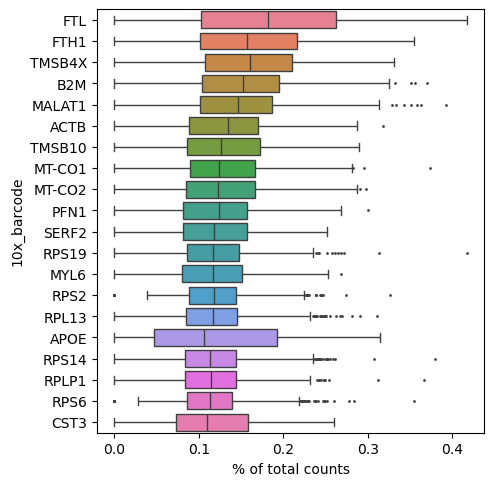

In [26]:
sc.pl.highest_expr_genes(adata, n_top=20)

# 3. Preprocessing

Basic preprocessing (pp) has been performed as follows:

- Filtering cell outliers based on counts and numbers of genes expressed ```pp.filter_cells```
- Filtering genes based on the number of cells or counts ```pp.fillter_genes```
- Calculating quality control metrics ```pp.calculate_qc_metrics```
- Normalize counts per cell ```pp.normalize_total```
- Logarithmize the data matrix ```pp.log1p```



In [27]:
#Filter cell outliers based on counts and numbers of genes expressed
#get rid the cells with the fewer than 200 genes
sc.pp.filter_cells(adata, min_genes=200)
adata

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['n_genes'] = number


AnnData object with n_obs × n_vars = 9609 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y', 'n_genes'

In [28]:
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 9609 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y', 'n_genes'
    var: 'n_cells'

In [29]:
adata.obs.head(3)

10x_barcode                   patient  time  sample_ID  clst    TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0  45.33631   
10x_3288_t1_AAACATACTCCTAT-1      5.0   1.0     3288.1   1.0  35.07609   
10x_3288_t1_AAACATTGAACTGC-1      5.0   1.0     3288.1   1.0  27.41272   

10x_barcode                      TSNE_y  n_genes  
10x_3288_t1_AAACATACCTTCCG-1  46.933480      839  
10x_3288_t1_AAACATACTCCTAT-1 -20.101050     1196  
10x_3288_t1_AAACATTGAACTGC-1  -1.876431     1343

In [30]:
adata.var

n_cells
10x_barcode         
AL627309.1       339
LINC00115        111
SAMD11           374
NOC2L           2157
HES4             670
...              ...
MT-CYB          9416
AL592183.1       438
AL354822.1       364
PNRC2            481
SRSF101          491

[11548 rows x 1 columns]

**Note** Annotating mitochondrial genes in single-cell RNA sequencing (scRNA-seq) datasets is a common step in quality control (QC) analysis. Mitochondrial genes are often used as indicators of cell quality because they can reflect various aspects such as cell stress, apoptosis, or technical artifacts during the experimental procedure.

In [31]:
#annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var

n_cells     mt
10x_barcode                
AL627309.1       339  False
LINC00115        111  False
SAMD11           374  False
NOC2L           2157  False
HES4             670  False
...              ...    ...
MT-CYB          9416   True
AL592183.1       438  False
AL354822.1       364  False
PNRC2            481  False
SRSF101          491  False

[11548 rows x 2 columns]

In [32]:
adata.var[adata.var.mt == True]

n_cells    mt
10x_barcode               
MT-ND1          9315  True
MT-ND2          9248  True
MT-CO1          9551  True
MT-CO2          9515  True
MT-ATP8          621  True
MT-ATP6         9139  True
MT-CO3          9484  True
MT-ND3          3037  True
MT-ND4L         1826  True
MT-ND4          9474  True
MT-ND5          7040  True
MT-ND6          1444  True
MT-CYB          9416  True

In [33]:
#Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [34]:
adata.obs.head(3)

10x_barcode                   patient  time  sample_ID  clst    TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0  45.33631   
10x_3288_t1_AAACATACTCCTAT-1      5.0   1.0     3288.1   1.0  35.07609   
10x_3288_t1_AAACATTGAACTGC-1      5.0   1.0     3288.1   1.0  27.41272   

10x_barcode                      TSNE_y  n_genes  n_genes_by_counts  \
10x_3288_t1_AAACATACCTTCCG-1  46.933480      839                839   
10x_3288_t1_AAACATACTCCTAT-1 -20.101050     1196               1196   
10x_3288_t1_AAACATTGAACTGC-1  -1.876431     1343               1343   

10x_barcode                   total_counts  total_counts_mt  pct_counts_mt  
10x_3288_t1_AAACATACCTTCCG-1   4677.995021        85.142607       1.820066  
10x_3288_t1_AAACATACTCCTAT-1   5899.825868        55.612541       0.942613  
10x_3288_t1_AAACATTGAACTGC-1   6746.130015        42.718516       0.633230

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


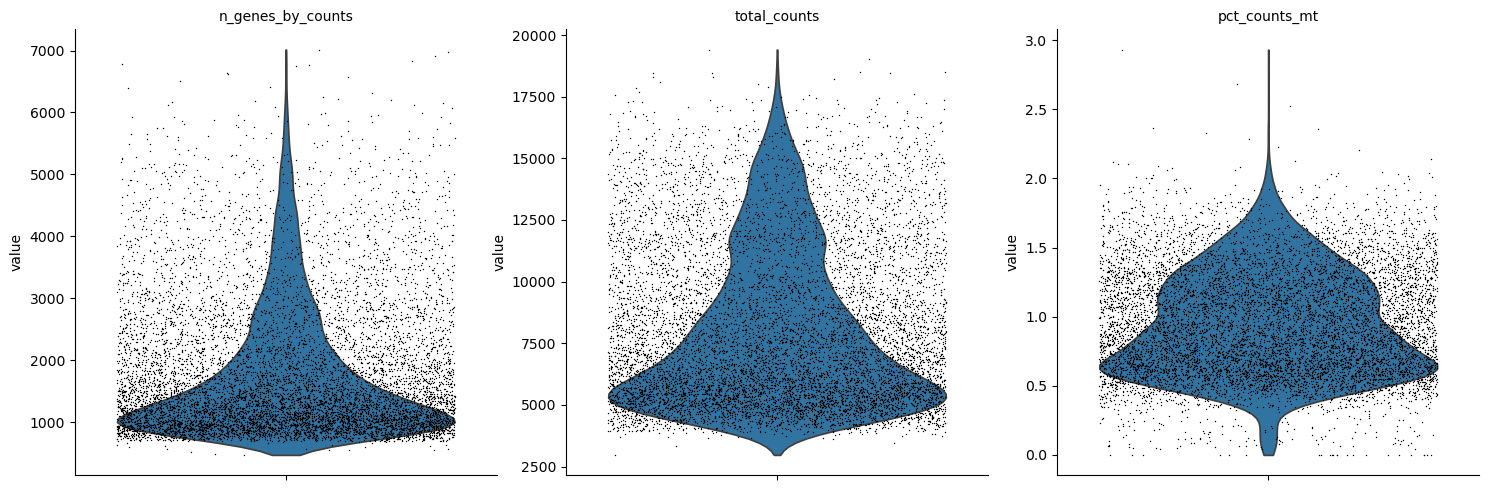

In [35]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# “n_genes_by_counts” = The number of genes with at least 1 count in a cell. Calculated for all cells.
# “total_counts” = Sum of counts for a gene. (no.gene)
# “pct_counts_mt” = The proportion of total counts for a cell that come from mitochondrial genes.

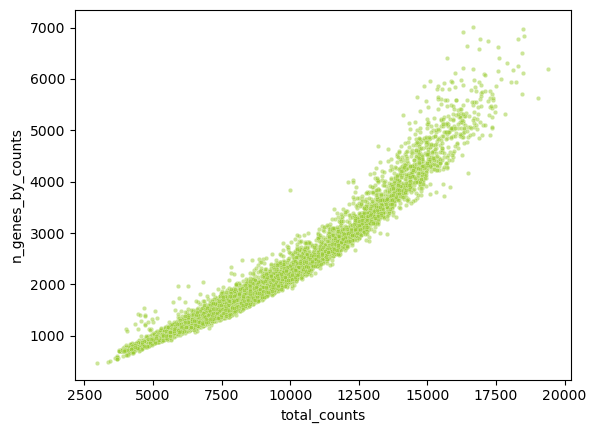

In [36]:
sns.scatterplot(adata.obs, x='total_counts', y='n_genes_by_counts', color='yellowgreen', alpha=0.5, s=10)
plt.show()

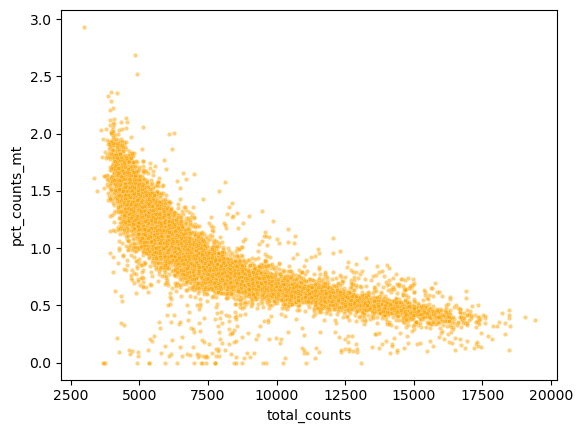

In [37]:
sns.scatterplot(adata.obs, x='total_counts', y='pct_counts_mt', color='orange', alpha=0.5, s=10)
plt.show()

The visualization provides insight into filtering out outliers. However, rather than subjective selection, you can utilize quantiles. In this approach, upper and lower limits of 98% and 2%, respectively, are employed.

In [38]:
upper_limit = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)
lower_limit = np.quantile(adata.obs.n_genes_by_counts.values, 0.02)
print(f'{lower_limit} to {upper_limit}')

743.0 to 4933.68


In [39]:
adata = adata[(adata.obs.n_genes_by_counts > lower_limit) & (adata.obs.n_genes_by_counts < upper_limit)]
adata

View of AnnData object with n_obs × n_vars = 9222 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [40]:
adata = adata[adata.obs.pct_counts_mt < 2.5]
adata

View of AnnData object with n_obs × n_vars = 9220 × 11548
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [41]:
#Normalize each cell by total counts over all genes, 
#so that every cell has the same total count after normalization
#normalize every cell to 10000 UMI

#for example cell 7 has total count
adata.X[7,:].sum()

array(4189.2447468)

In [42]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [43]:
adata.X[7,:].sum()

10000.0

In [44]:
#change to log counts
sc.pp.log1p(adata)

In [45]:
adata.X[7,:].sum()

1981.2109116416493

# 3. Clustering

- Annotate highly variable genes ```pp.highly_variable_genes```
- Regress out (mostly) unwanted sources of variation ```pp.regress_out```
- Scale data to unit variance and zero mean ```pp.scale```
- Principal component analysis ```pp.pca```
- Computes the nearest neighbors distance matrix and a neighborhood graph of observations ```pp.neighbors```
- Embed the neighborhood graph using UMAP ```tl.umap```

In [46]:
sc.pp.highly_variable_genes(adata, min_disp=0.5, min_mean=0.0125, max_mean=3)

In [47]:
adata.var[adata.var.highly_variable]

n_cells     mt  n_cells_by_counts  mean_counts  \
10x_barcode                                                   
AL627309.1       339  False                339     0.149797   
ISG15           5615  False               5615     3.020989   
TNFRSF18         555  False                555     0.245478   
TNFRSF4          267  False                267     0.107276   
NADK            1003  False               1003     0.383765   
...              ...    ...                ...          ...   
MT-CO2          9515   True               9515     8.768993   
MT-ATP8          621   True                621     0.242305   
MT-ND3          3037   True               3037     1.382470   
MT-ND4L         1826   True               1826     0.751438   
AL592183.1       438  False                438     0.156358   

             pct_dropout_by_counts  total_counts  highly_variable     means  \
10x_barcode                                                                   
AL627309.1               96.472057   1439.400042             True  0.225970   
ISG15                    41.565199  29028.684534             True  1.623625   
TNFRSF18                 94.224165   2358.796467             True  0.235317   
TNFRSF4                  97.221355   1030.812209             True  0.123088   
NADK                     89.561869   3687.595384             True  0.415443   
...                            ...           ...              ...       ...   
MT-CO2                    0.978250  84261.254649             True  2.611665   
MT-ATP8                  93.537309   2328.313060             True  0.261715   
MT-ND3                   68.394214  13284.158848             True  1.066024   
MT-ND4L                  80.996982   7220.566364             True  0.672317   
AL592183.1               95.441773   1502.448796             True  0.174889   

             dispersions  dispersions_norm  
10x_barcode                                 
AL627309.1      2.085743          2.602522  
ISG15           1.477633          1.059764  
TNFRSF18        1.819644          1.000379  
TNFRSF4         1.944196          1.502325  
NADK            1.845604          1.323397  
...                  ...               ...  
MT-CO2          0.629892          1.178126  
MT-ATP8         1.758584          0.632746  
MT-ND3          1.755960          2.017625  
MT-ND4L         1.718420          0.745708  
AL592183.1      1.773291          0.721292  

[3258 rows x 10 columns]

In [48]:
#save raw data before processing values and filtering
adata.raw = adata

In [49]:
#filter highly variable
adata = adata[:, adata.var.highly_variable]

In [50]:
#9229 cells and 3258 genes
adata

View of AnnData object with n_obs × n_vars = 9220 × 3258
    obs: 'patient', 'time', 'sample_ID', 'clst', 'TSNE_x', 'TSNE_y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [51]:
#regress out effects of total count per cells and mitochondia counts
sc.pp.regress_out(adata, ['total_counts','pct_counts_mt'])

In [52]:
#scale each gene to unit variance
sc.pp.scale(adata, max_value=10)

In [53]:
adata.X.min()

-21.932250059292354

In [54]:
#PCA
sc.tl.pca(adata, svd_solver='arpack')

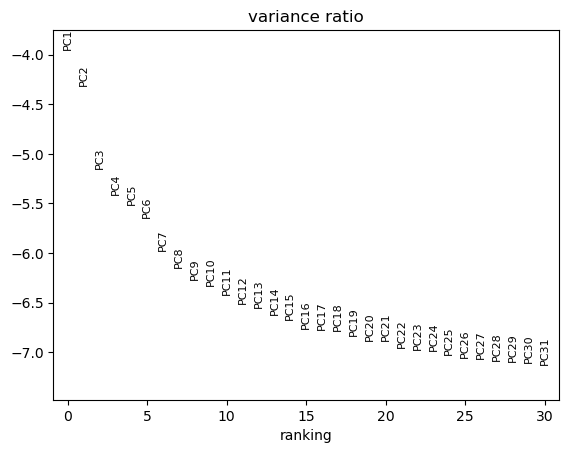

In [55]:
sc.pl.pca_variance_ratio(adata, log=True)

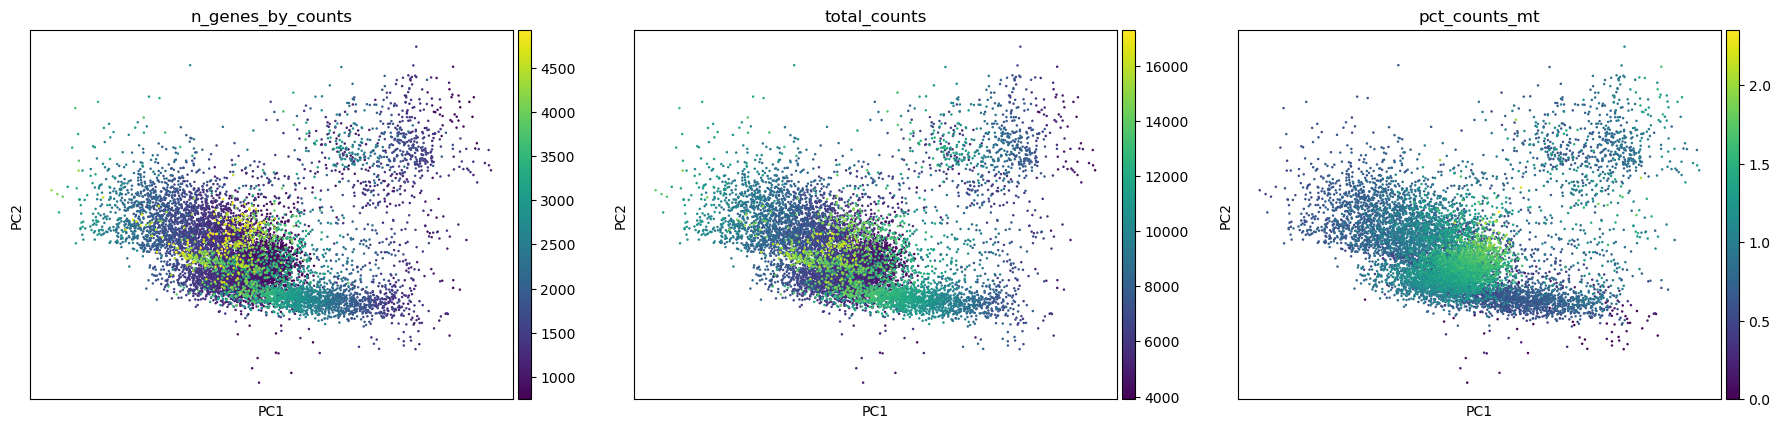

In [56]:
sc.pl.pca(adata, color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

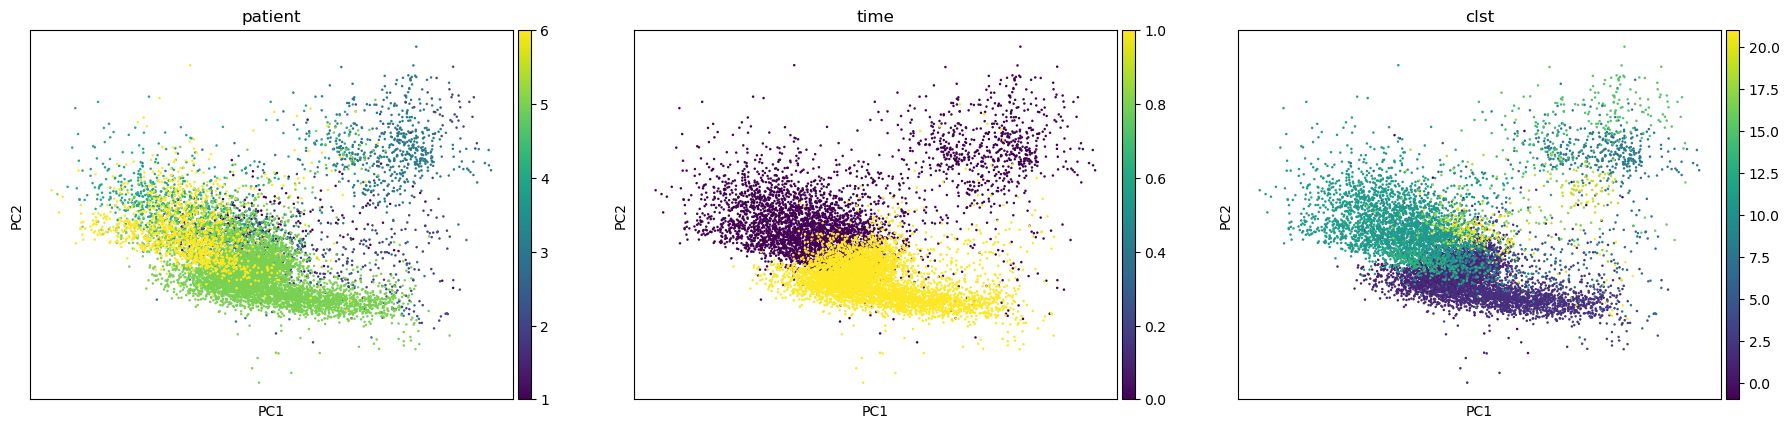

In [57]:
sc.pl.pca(adata, color=['patient', 'time',  'clst'])

In [58]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=25)

In [59]:
sc.tl.umap(adata)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


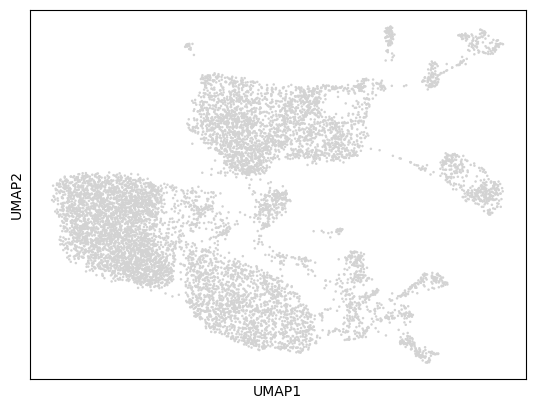

In [60]:
sc.pl.umap(adata)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


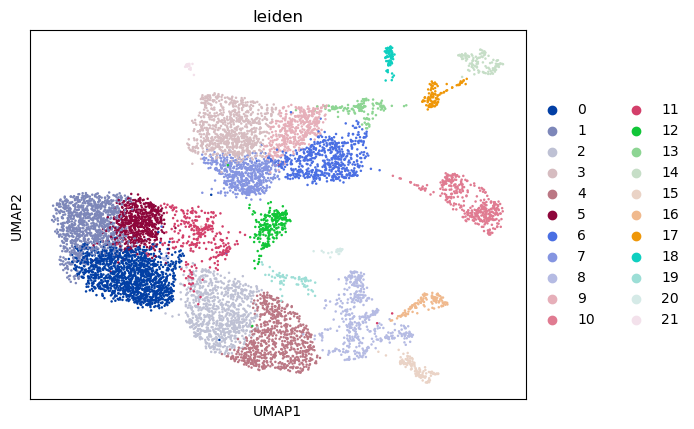

In [61]:
#Cluster cells into subgroups
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


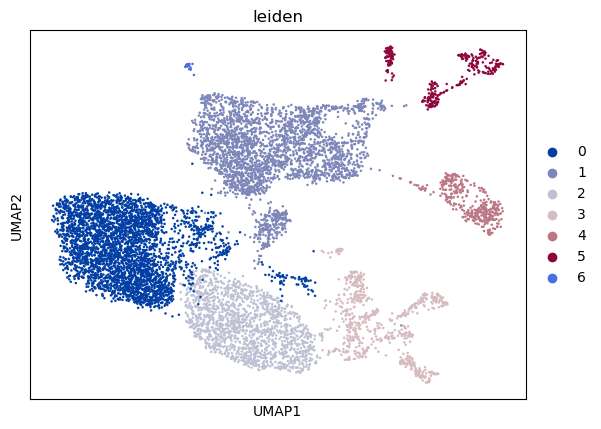

In [62]:
#A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters.
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata, color=['leiden'])

# 4. Find makers
- Rank genes for characterizing groups ```tl.rank_genes_groups```

In [63]:
#group by leiden
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

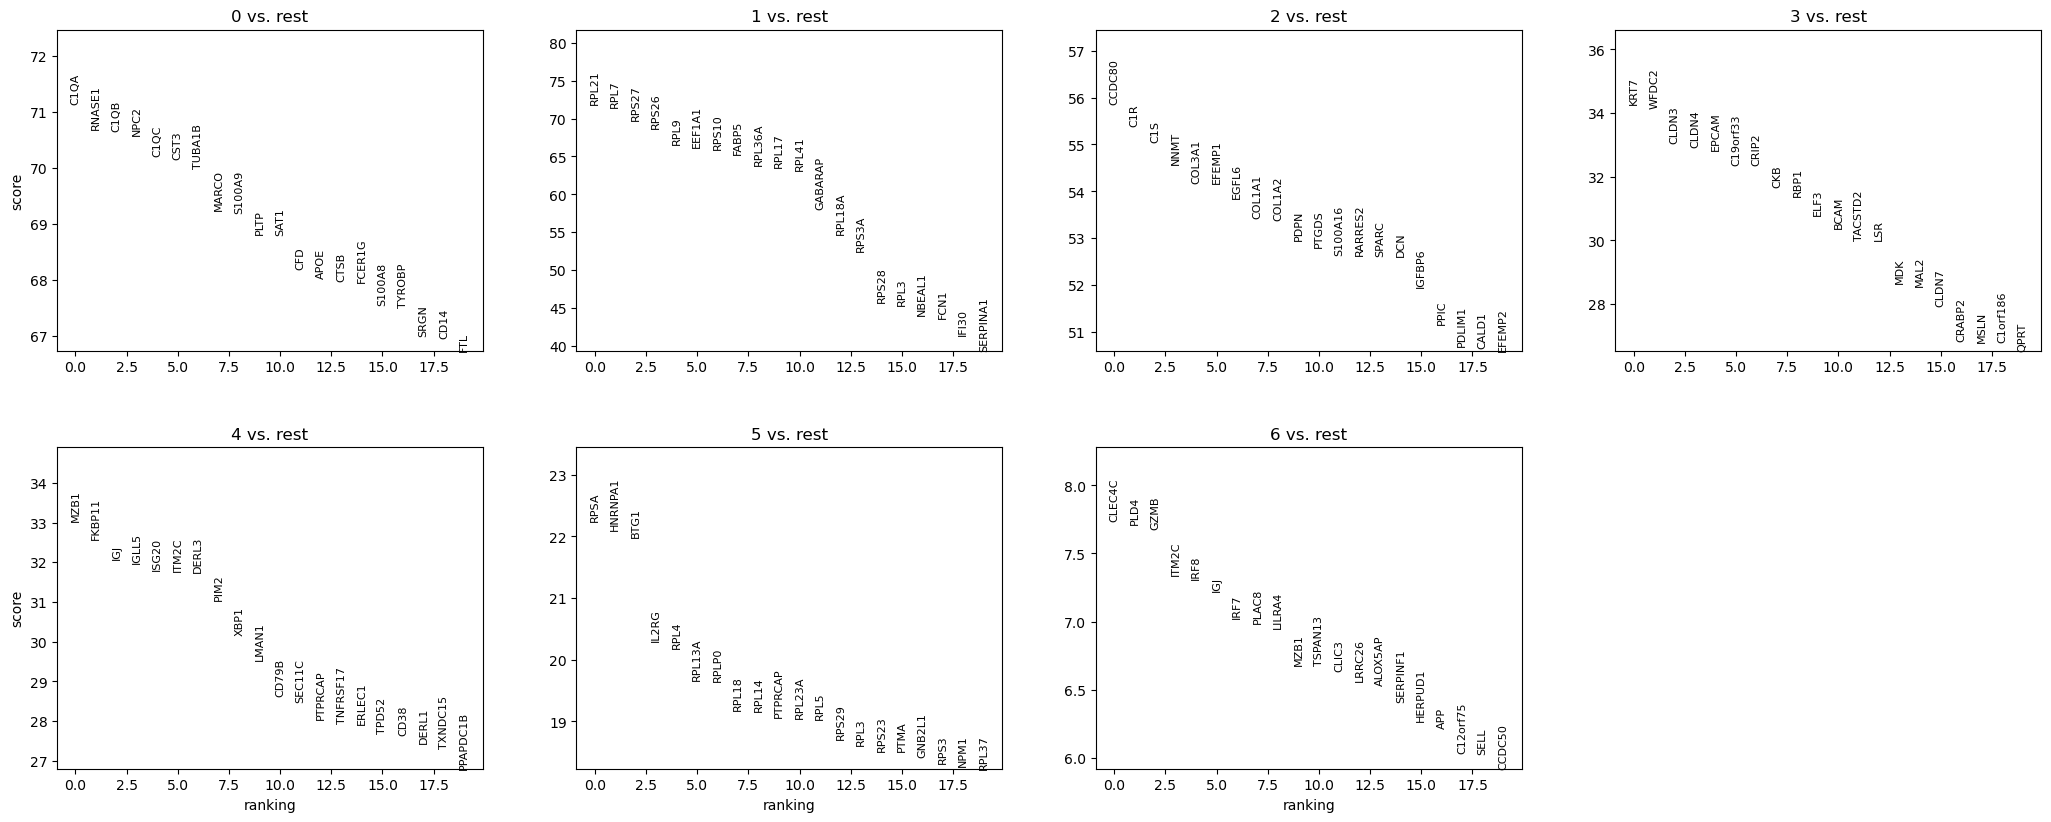

In [64]:
#Plot ranking of genes for all tested comparisons.
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


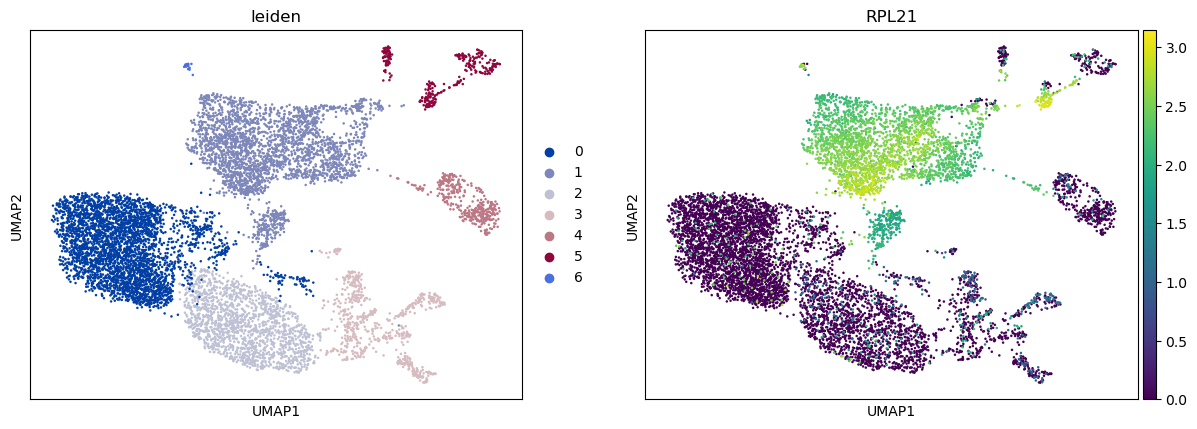

In [65]:
#for example RPL21 highly expresses in cluster 1
sc.pl.umap(adata, color=['leiden', 'RPL21'])

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


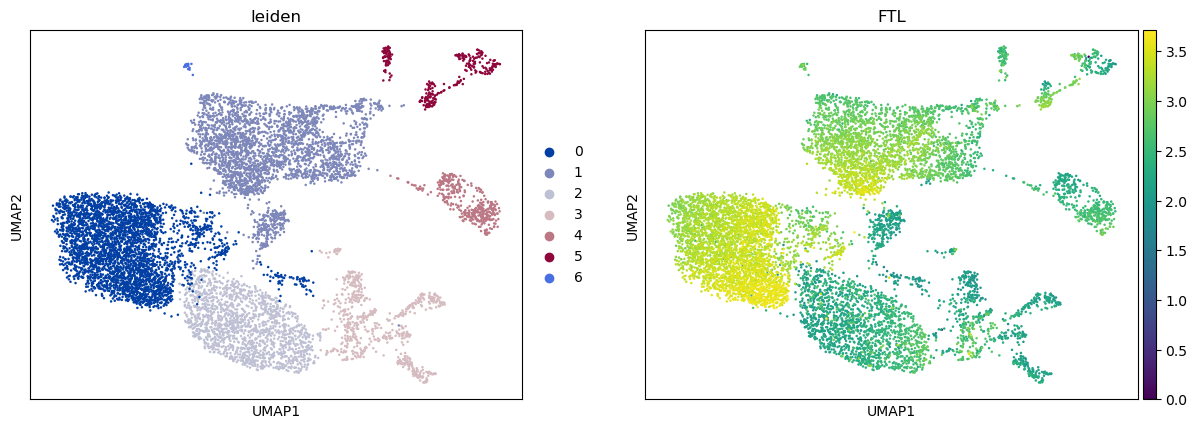

In [66]:
#for example FTL highly expresses in all cels
sc.pl.umap(adata, color=['leiden', 'FTL'])

In [67]:
#this is dictionary of 'rank_genes_groups'
adata.uns['rank_genes_groups']

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('C1QA', 'RPL21', 'CCDC80', 'KRT7', 'MZB1', 'RPSA', 'CLEC4C'),
            ('RNASE1', 'RPL7', 'C1R', 'WFDC2', 'FKBP11', 'HNRNPA1', 'PLD4'),
            ('C1QB', 'RPS27', 'C1S', 'CLDN3', 'IGJ', 'BTG1', 'GZMB'), ...,
            ('RPL9', 'CD59', 'TYROBP', 'HLA-B', 'APOE', 'RNASE1', 'NINJ1'),
            ('EEF1A1', 'NUPR1', 'SRGN', 'B2M', 'CST3', 'PLTP', 'HSPB1'),
            ('RPS27', 'SEPP1', 'CD74', 'EMP3', 'TIMP1', 'FCGRT', 'LGALS3')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O')]),
 'scores': rec.array([( 71.14672 ,  71.961525,  55.869568,  34.28942 ,  33.025333,  22.241495,  7.734618 ),
            ( 70.695045,  71.547935,  55.379604,  34.157936,  32.57058 ,  22.10426 ,  7.713341 ),
            ( 70.66373 ,  69.80566 ,  55.036907,  33.05989 ,  32.064278,

In [68]:
#get all genes list in cluster 1
adata.uns['rank_genes_groups']['names']['1']

array(['RPL21', 'RPL7', 'RPS27', ..., 'CD59', 'NUPR1', 'SEPP1'],
      dtype=object)

In [69]:
results['names'].dtype.names

NameError: name 'results' is not defined

In [ ]:
#out = np.array([[0,0,0,0,0]])
#for group in results['names'].dtype.names:
    #out = np.vstack((out, np.vstack((results['names'][group],
                                   #results['scores'][group],
                                   #results['pvals_adj'][group],
                                   #results['logfoldchanges'][group],
                                   #np.array([group]*len(results['names'][group])).astype('object'))).T))

In [70]:
#try to create dataframe from this information ''rank_genes_groups''
results = adata.uns['rank_genes_groups']

# Initialize an empty list to store the rows of the DataFrame
out = []

# Iterate over the groups in the rank_genes_groups results
for group in results['names'].dtype.names:
    # Create a DataFrame for the current group
    df_group = pd.DataFrame({
        'gene': results['names'][group],
        'score': results['scores'][group],
        'pvals_adj': results['pvals_adj'][group],
        'logfoldchanges': results['logfoldchanges'][group],
        'cluster': [group] * len(results['names'][group])  # Replicate the group name
    })
    # Append the DataFrame for the current group to the out list
    out.append(df_group)

# Concatenate the DataFrames for all groups into a single DataFrame
df_markers= pd.concat(out, ignore_index=True)

In [71]:
df_markers

gene      score  pvals_adj  logfoldchanges cluster
0        C1QA  71.146721   0.000000        2.411017       0
1      RNASE1  70.695045   0.000000        2.448473       0
2        C1QB  70.663727   0.000000        2.492324       0
3        NPC2  70.585541   0.000000        1.135121       0
4        C1QC  70.217308   0.000000        2.505332       0
...       ...        ...        ...             ...     ...
80831   DUSP1  -4.450538   0.001978       -3.695987       6
80832   SEPP1  -4.673275   0.000761       -4.892859       6
80833   NINJ1  -4.781890   0.000501       -5.089948       6
80834   HSPB1  -4.827682   0.000409       -2.571821       6
80835  LGALS3  -4.915902   0.000269       -2.915628       6

[80836 rows x 5 columns]

In [72]:
sig_markers = df_markers[(df_markers.pvals_adj < 0.05) & (abs(df_markers.logfoldchanges) > 1)]

In [73]:
sig_markers

gene      score  pvals_adj  logfoldchanges cluster
0        C1QA  71.146721   0.000000        2.411017       0
1      RNASE1  70.695045   0.000000        2.448473       0
2        C1QB  70.663727   0.000000        2.492324       0
3        NPC2  70.585541   0.000000        1.135121       0
4        C1QC  70.217308   0.000000        2.505332       0
...       ...        ...        ...             ...     ...
80831   DUSP1  -4.450538   0.001978       -3.695987       6
80832   SEPP1  -4.673275   0.000761       -4.892859       6
80833   NINJ1  -4.781890   0.000501       -5.089948       6
80834   HSPB1  -4.827682   0.000409       -2.571821       6
80835  LGALS3  -4.915902   0.000269       -2.915628       6

[21477 rows x 5 columns]

In [74]:
sig_markers[sig_markers.cluster == '1']

gene      score      pvals_adj  logfoldchanges cluster
11548  RPL21  71.961525   0.000000e+00        5.698124       1
11549   RPL7  71.547935   0.000000e+00        5.180815       1
11550  RPS27  69.805656   0.000000e+00        4.447435       1
11551  RPS26  68.746582   0.000000e+00        5.729039       1
11552   RPL9  66.642868   0.000000e+00        4.029636       1
...      ...        ...            ...             ...     ...
23089  UQCRB -22.660748  2.103815e-111       -1.475034       1
23092   SOD2 -25.555590  1.308416e-141       -1.090598       1
23093   CD59 -32.596130  1.679289e-230       -1.439207       1
23094  NUPR1 -35.485519  3.390766e-273       -1.996205       1
23095  SEPP1 -37.398121  2.017171e-303       -1.954886       1

[1360 rows x 5 columns]

In [75]:
adata.raw.var_names

Index(['AL627309.1', 'LINC00115', 'SAMD11', 'NOC2L', 'HES4', 'ISG15', 'AGRN',
       'C1orf159', 'TNFRSF18', 'TNFRSF4',
       ...
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB',
       'AL592183.1', 'AL354822.1', 'PNRC2', 'SRSF101'],
      dtype='object', name='10x_barcode', length=11548)

In [76]:
RPL21_id = np.where(adata.raw.var_names == 'RPL21')[0][0]
print(RPL21_id)

7687


In [77]:
#we have RPL21 for 9220 cells
RPL21 = adata.raw.X[:, RPL21_id]
print(RPL21.shape)

(9220,)


In [78]:
adata.obs['RPL21_exp'] = RPL21

In [79]:
adata.obs

10x_barcode                   patient  time  sample_ID  clst      TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0   45.336310   
10x_3288_t1_AAACATACTCCTAT-1      5.0   1.0     3288.1   1.0   35.076090   
10x_3288_t1_AAACATTGAACTGC-1      5.0   1.0     3288.1   1.0   27.412720   
10x_3288_t1_AAACATTGCTGACA-1      5.0   1.0     3288.1   2.0  -12.224810   
10x_3288_t1_AAACCGTGACAGTC-1      5.0   1.0     3288.1   2.0   -1.349342   
...                               ...   ...        ...   ...         ...   
10x_3250_t2_TTGAGGTGTTGGCA-1      2.0   1.0     3250.1   7.0   96.709030   
10x_3250_t2_TTGGTACTGTTACG-1      2.0   1.0     3250.1   9.0   47.794190   
10x_3250_t2_TTGTCATGTGCTAG-1      2.0   1.0     3250.1   7.0   99.834030   
10x_3250_t2_TTTCAGTGTTTGCT-1      2.0   1.0     3250.1   7.0  105.878200   
10x_3250_t2_TTTGACTGTTTCAC-1      2.0   1.0     3250.1   9.0   46.376580   

10x_barcode                      TSNE_y  n_genes  n_genes_by_counts  \
10x_3288_t1_AAACATACCTTCCG-1  46.933480      839                839   
10x_3288_t1_AAACATACTCCTAT-1 -20.101050     1196               1196   
10x_3288_t1_AAACATTGAACTGC-1  -1.876431     1343               1343   
10x_3288_t1_AAACATTGCTGACA-1 -86.460820     2358               2358   
10x_3288_t1_AAACCGTGACAGTC-1 -65.225150     2022               2022   
...                                 ...      ...                ...   
10x_3250_t2_TTGAGGTGTTGGCA-1  21.813120     2282               2282   
10x_3250_t2_TTGGTACTGTTACG-1 -77.083860     3732               3732   
10x_3250_t2_TTGTCATGTGCTAG-1  43.987770     3929               3929   
10x_3250_t2_TTTCAGTGTTTGCT-1  18.112790     2341               2341   
10x_3250_t2_TTTGACTGTTTCAC-1 -66.513030     3464               3464   

10x_barcode                   total_counts  total_counts_mt  pct_counts_mt  \
10x_3288_t1_AAACATACCTTCCG-1   4677.995021        85.142607       1.820066   
10x_3288_t1_AAACATACTCCTAT-1   5899.825868        55.612541       0.942613   
10x_3288_t1_AAACATTGAACTGC-1   6746.130015        42.718516       0.633230   
10x_3288_t1_AAACATTGCTGACA-1  10510.567780        68.581519       0.652501   
10x_3288_t1_AAACCGTGACAGTC-1   9628.697913        85.934097       0.892479   
...                                    ...              ...            ...   
10x_3250_t2_TTGAGGTGTTGGCA-1  10162.617408        55.764826       0.548725   
10x_3250_t2_TTGGTACTGTTACG-1  13291.688078        66.447866       0.499920   
10x_3250_t2_TTGTCATGTGCTAG-1  14346.916820        76.109658       0.530495   
10x_3250_t2_TTTCAGTGTTTGCT-1  10651.931188        65.858616       0.618279   
10x_3250_t2_TTTGACTGTTTCAC-1  13378.572365        63.347970       0.473503   

10x_barcode                  leiden  RPL21_exp  
10x_3288_t1_AAACATACCTTCCG-1      0   2.439337  
10x_3288_t1_AAACATACTCCTAT-1      0   0.000000  
10x_3288_t1_AAACATTGAACTGC-1      0   0.000000  
10x_3288_t1_AAACATTGCTGACA-1      2   0.000000  
10x_3288_t1_AAACCGTGACAGTC-1      2   0.000000  
...                             ...        ...  
10x_3250_t2_TTGAGGTGTTGGCA-1      3   0.000000  
10x_3250_t2_TTGGTACTGTTACG-1      0   0.000000  
10x_3250_t2_TTGTCATGTGCTAG-1      3   0.000000  
10x_3250_t2_TTTCAGTGTTTGCT-1      3   1.470937  
10x_3250_t2_TTTGACTGTTTCAC-1      0   1.098946  

[9220 rows x 13 columns]

In [80]:
adata.obs[adata.obs.RPL21_exp > 0]

10x_barcode                   patient  time  sample_ID  clst     TSNE_x  \
10x_3288_t1_AAACATACCTTCCG-1      5.0   1.0     3288.1   1.0   45.33631   
10x_3288_t1_AAACGGCTCGCATA-1      5.0   1.0     3288.1   1.0   17.69324   
10x_3288_t1_AACCGCCTGGTGAG-1      5.0   1.0     3288.1   2.0   23.34367   
10x_3288_t1_AACCTTACGCTATG-1      5.0   1.0     3288.1   1.0   37.75743   
10x_3288_t1_AACGCAACAGGCGA-1      5.0   1.0     3288.1   2.0   13.22268   
...                               ...   ...        ...   ...        ...   
10x_3250_t2_TGGTAGTGCGTTGA-1      2.0   1.0     3250.1   9.0   43.77076   
10x_3250_t2_TGTGAGTGCTCAGA-1      2.0   1.0     3250.1   9.0   50.06768   
10x_3250_t2_TTCAAAGATCTTCA-1      2.0   1.0     3250.1   7.0   97.83105   
10x_3250_t2_TTTCAGTGTTTGCT-1      2.0   1.0     3250.1   7.0  105.87820   
10x_3250_t2_TTTGACTGTTTCAC-1      2.0   1.0     3250.1   9.0   46.37658   

10x_barcode                      TSNE_y  n_genes  n_genes_by_counts  \
10x_3288_t1_AAACATACCTTCCG-1  46.933480      839                839   
10x_3288_t1_AAACGGCTCGCATA-1  -0.406647     1202               1202   
10x_3288_t1_AACCGCCTGGTGAG-1 -54.339950     1879               1879   
10x_3288_t1_AACCTTACGCTATG-1  -7.420122     1169               1169   
10x_3288_t1_AACGCAACAGGCGA-1 -76.777930     2709               2709   
...                                 ...      ...                ...   
10x_3250_t2_TGGTAGTGCGTTGA-1 -65.384790     2911               2911   
10x_3250_t2_TGTGAGTGCTCAGA-1 -65.425820     4876               4876   
10x_3250_t2_TTCAAAGATCTTCA-1  39.227550     4221               4221   
10x_3250_t2_TTTCAGTGTTTGCT-1  18.112790     2341               2341   
10x_3250_t2_TTTGACTGTTTCAC-1 -66.513030     3464               3464   

10x_barcode                   total_counts  total_counts_mt  pct_counts_mt  \
10x_3288_t1_AAACATACCTTCCG-1   4677.995021        85.142607       1.820066   
10x_3288_t1_AAACGGCTCGCATA-1   6134.655649        73.582846       1.199462   
10x_3288_t1_AACCGCCTGGTGAG-1   9466.553730        75.283495       0.795258   
10x_3288_t1_AACCTTACGCTATG-1   5755.887459        66.617326       1.157377   
10x_3288_t1_AACGCAACAGGCGA-1  11695.755628        68.472680       0.585449   
...                                    ...              ...            ...   
10x_3250_t2_TGGTAGTGCGTTGA-1  11641.660120        56.162265       0.482425   
10x_3250_t2_TGTGAGTGCTCAGA-1  15874.899824        56.117669       0.353499   
10x_3250_t2_TTCAAAGATCTTCA-1  15366.543062        67.805776       0.441256   
10x_3250_t2_TTTCAGTGTTTGCT-1  10651.931188        65.858616       0.618279   
10x_3250_t2_TTTGACTGTTTCAC-1  13378.572365        63.347970       0.473503   

10x_barcode                  leiden  RPL21_exp  
10x_3288_t1_AAACATACCTTCCG-1      0   2.439337  
10x_3288_t1_AAACGGCTCGCATA-1      0   2.101372  
10x_3288_t1_AACCGCCTGGTGAG-1      2   1.719419  
10x_3288_t1_AACCTTACGCTATG-1      0   2.111586  
10x_3288_t1_AACGCAACAGGCGA-1      2   1.369467  
...                             ...        ...  
10x_3250_t2_TGGTAGTGCGTTGA-1      2   1.184498  
10x_3250_t2_TGTGAGTGCTCAGA-1      0   0.985452  
10x_3250_t2_TTCAAAGATCTTCA-1      3   0.934096  
10x_3250_t2_TTTCAGTGTTTGCT-1      3   1.470937  
10x_3250_t2_TTTGACTGTTTCAC-1      0   1.098946  

[3359 rows x 13 columns]

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


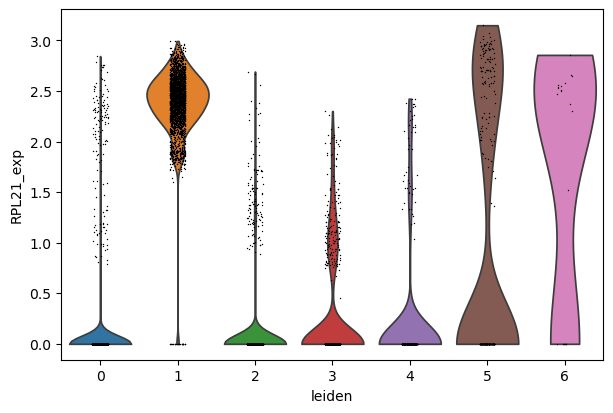

In [81]:
sc.pl.violin(adata, ['RPL21_exp'], groupby='leiden')

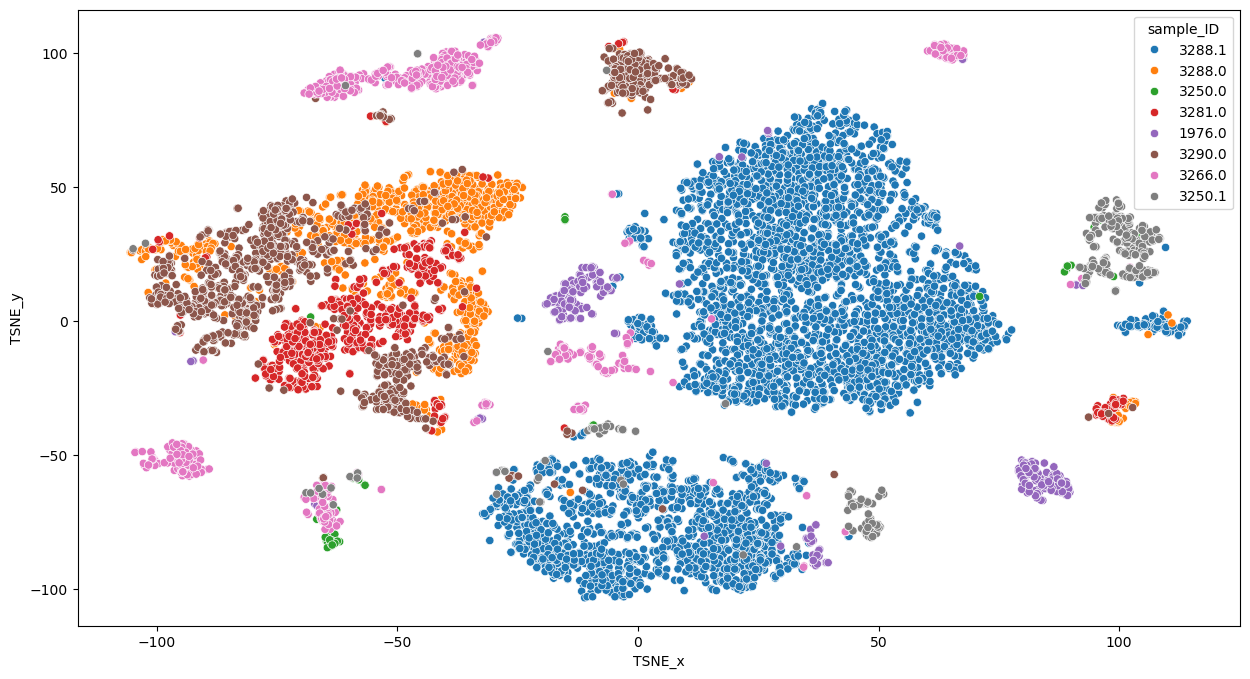

In [82]:
#try to plot tsne in the dataframe
fig = plt.figure(figsize = (15,8))
sns.scatterplot(x = adata.obs['TSNE_x'], y = adata.obs['TSNE_y'] , hue = adata.obs['sample_ID'].apply(lambda x: str(x))  )
plt.show()

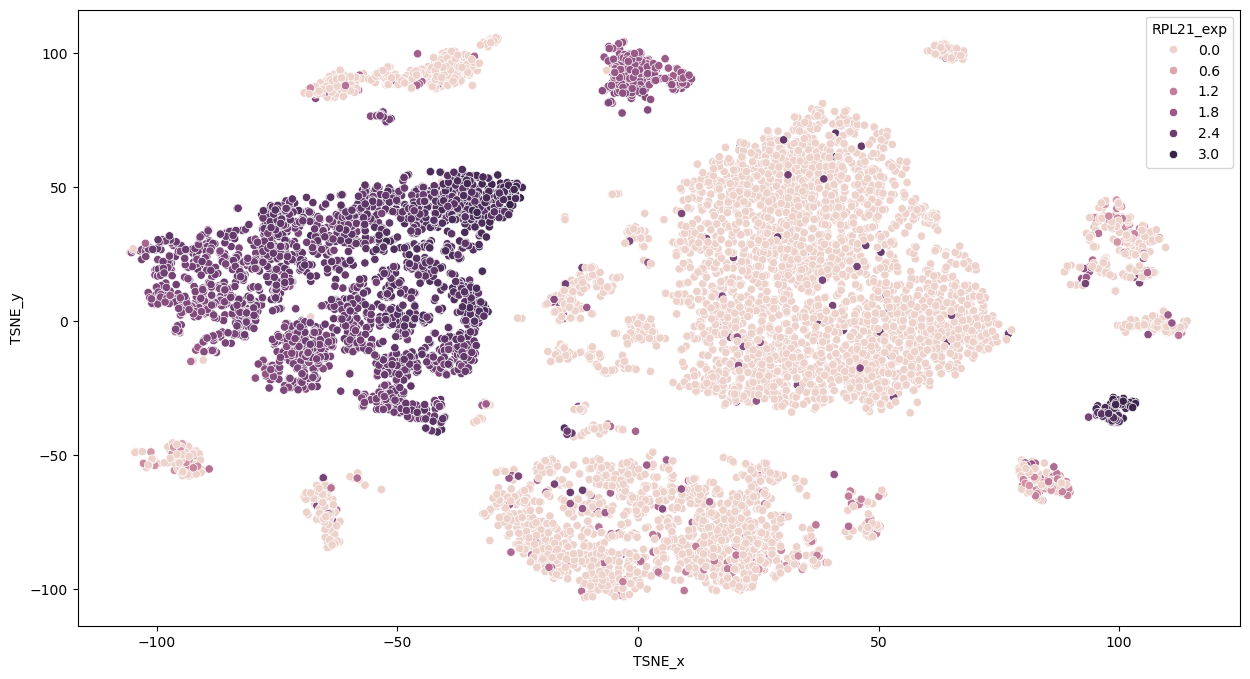

In [83]:
fig = plt.figure(figsize = (15,8))
sns.scatterplot(x = adata.obs['TSNE_x'], y = adata.obs['TSNE_y'] , hue = adata.obs['RPL21_exp'])
plt.show()

In [84]:
FTL_id = np.where(adata.raw.var_names == 'FTL')[0][0]
print(FTL_id)

10953


In [85]:
#we have FTL for 9220 cells
FTL = adata.raw.X[:, FTL_id]
print(FTL.shape)

(9220,)


In [86]:
adata.obs['FTL_exp'] = FTL

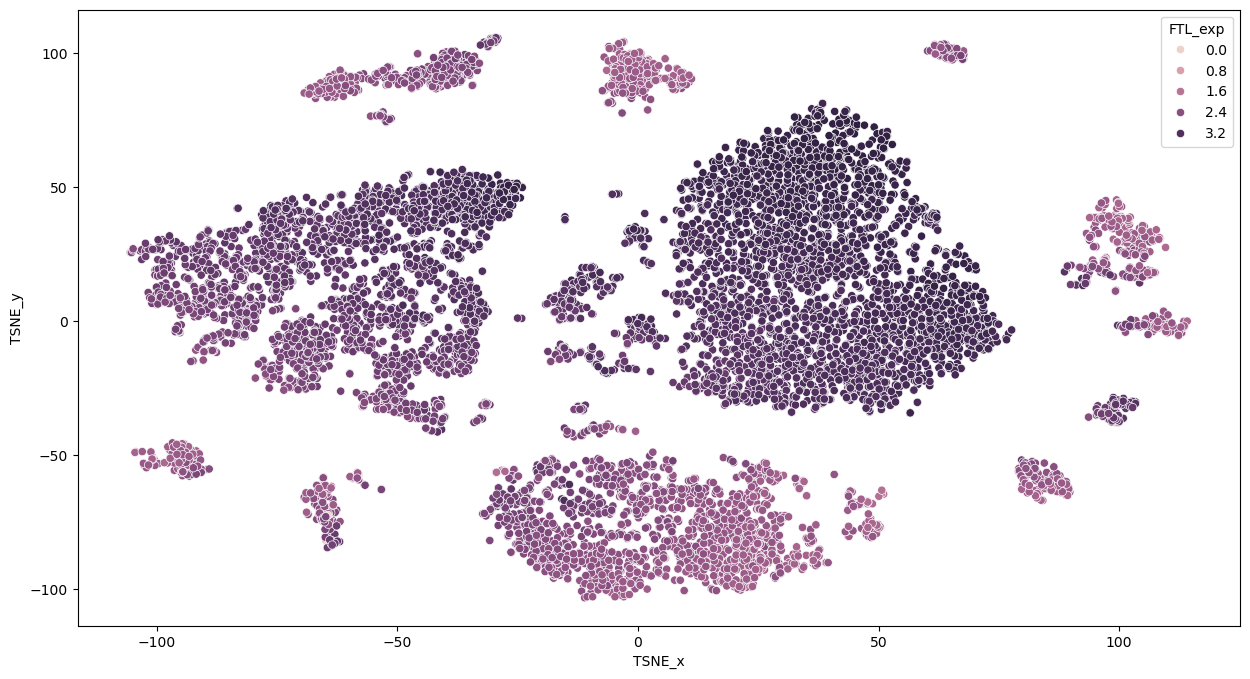

In [87]:
#I attempted to color the samples based on the expression of the FTL gene. 
#As expected, FTL is highly expressed in all samples, consistent with the previous graph.
fig = plt.figure(figsize = (15,8))
sns.scatterplot(x = adata.obs['TSNE_x'], y = adata.obs['TSNE_y'] , hue = adata.obs['FTL_exp'])
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


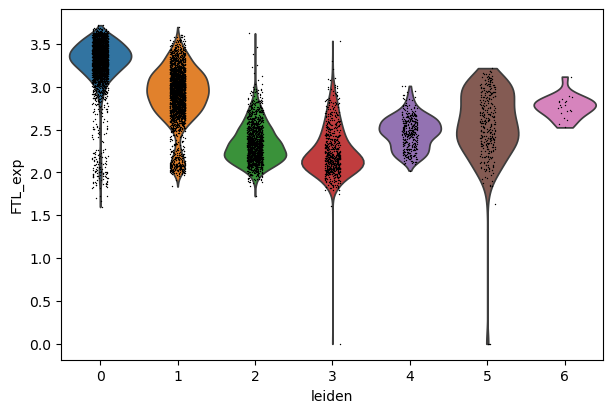

In [88]:
sc.pl.violin(adata, ['FTL_exp'], groupby='leiden')